In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea
import umap

In [11]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [12]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [13]:
class_names = ["T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

In [14]:
print("training set images shape: ", x_train.shape)
print("training set labels shape: ", y_train.shape)
print("test set images shape: ", x_test.shape)
print("test set labels shape: ", y_test.shape)

training set images shape:  (60000, 28, 28)
training set labels shape:  (60000,)
test set images shape:  (10000, 28, 28)
test set labels shape:  (10000,)


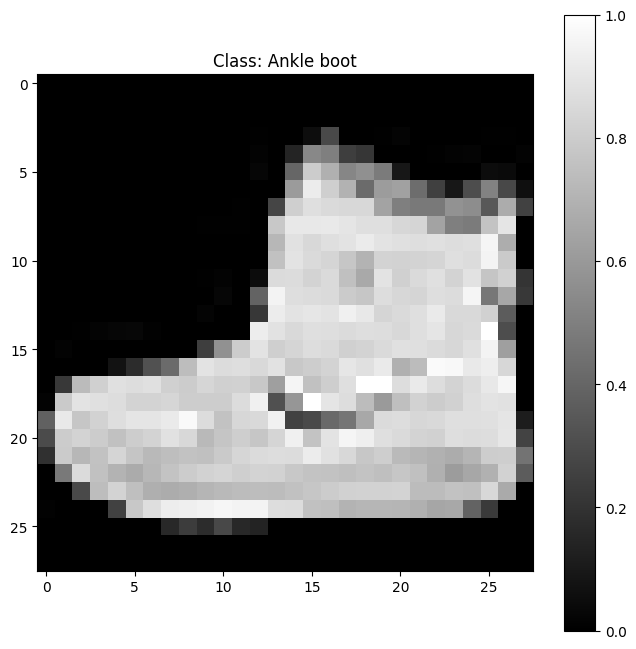

In [15]:
# display the first image from the training set
plt.figure(figsize=(8, 8))
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Class: {class_names[y_train[0]]}")
plt.colorbar()
plt.grid(False)
# plt.show()

In [17]:
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [16]:
shape = x_test.shape[1:]

In [18]:
latent_dim64 = 64
autoencoder64 = Autoencoder(latent_dim64, shape)

In [19]:
latent_dim2 = 2
autoencoder2 = Autoencoder(latent_dim2, shape)

In [20]:
latent_dim_miss = 64
autoencoder_miss = Autoencoder(latent_dim_miss, shape)

# what is an the purpose of the encoder?

# the encoder part of an autoencoder learns to compress the input into a smaller encoding
# this encoding reduced representation of the input but captures its salient features.essentially
# the encoder transforms the input into a latent space representation. it learns to preserve only the aspects
# of the data that are most important for reconstructing it

# what is the purpose of the decoder?

# the decoder takes the encoding provided by the encoder and attempts to recreate the original input using
# this reduced representation. the goal of the decoder is to reverse the process of the encoder, reconstructing
# the input data as accurately as possible from the compressed code


# what type of loss are we using and what does it do?

# autoencoders typically use a reconstruction loss to train the network, which measures how well the decoders
# output matches the original input. the common types 

In [21]:
autoencoder64.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder2.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [22]:
autoencoder64.fit(x_train, x_train,
                epochs=5,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0234 - val_loss: 0.0133
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0116 - val_loss: 0.0108
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0101 - val_loss: 0.0099
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0092 - val_loss: 0.0092


In [23]:
autoencoder2.fit(x_train, x_train,
                epochs=5,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0799 - val_loss: 0.0595
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0533 - val_loss: 0.0488
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0471 - val_loss: 0.0458
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0455 - val_loss: 0.0450
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0450 - val_loss: 0.0448


In [24]:
encoded_imgs64 = autoencoder64.encoder(x_test).numpy()
decoded_imgs64 = autoencoder64.decoder(encoded_imgs64).numpy()

In [25]:
encoded_imgs2 = autoencoder2.encoder(x_test).numpy()
decoded_imgs2 = autoencoder2.decoder(encoded_imgs2).numpy()

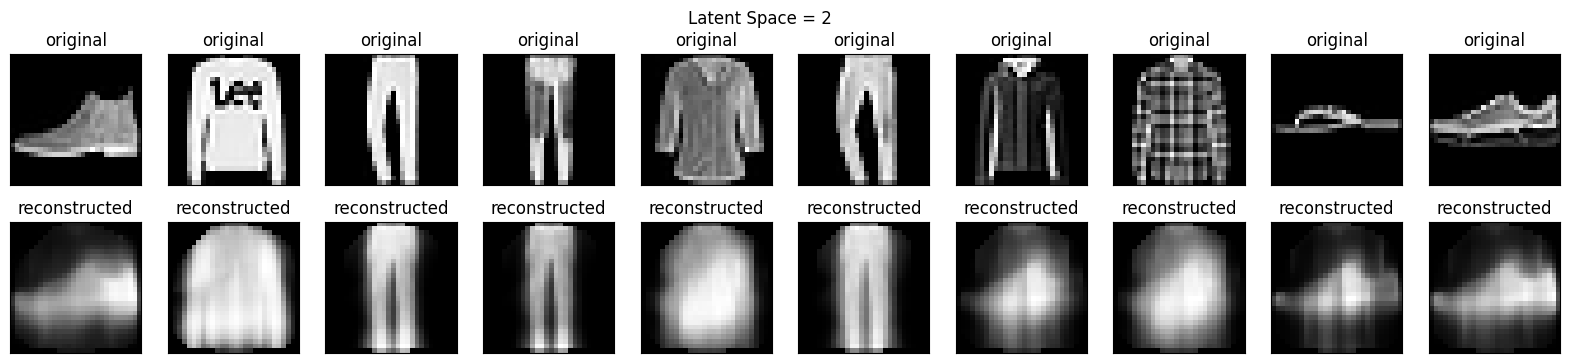

In [26]:
# visualization of the results

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs2[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.suptitle('Latent Space = 2')
plt.show()

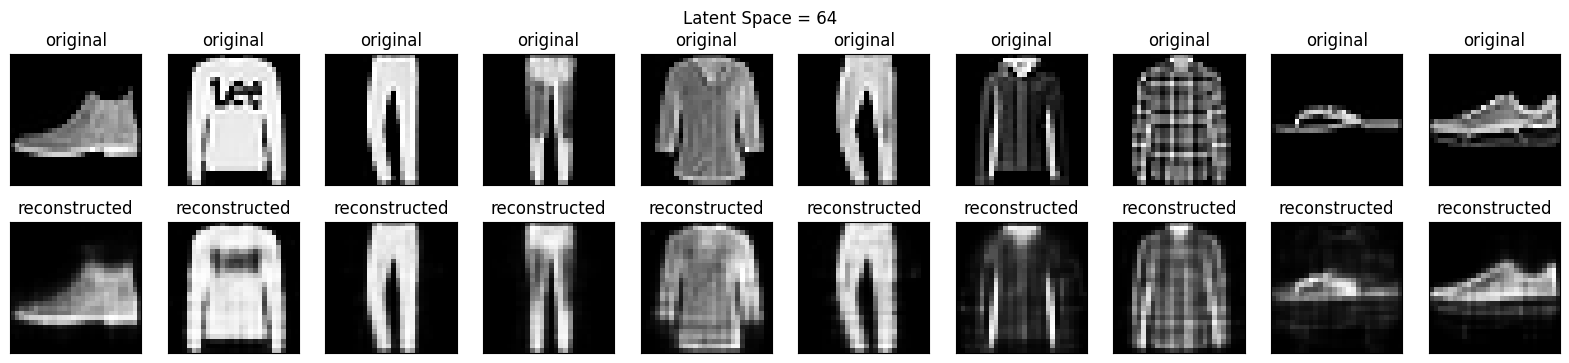

In [27]:
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs64[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.suptitle('Latent Space = 64')
plt.show()